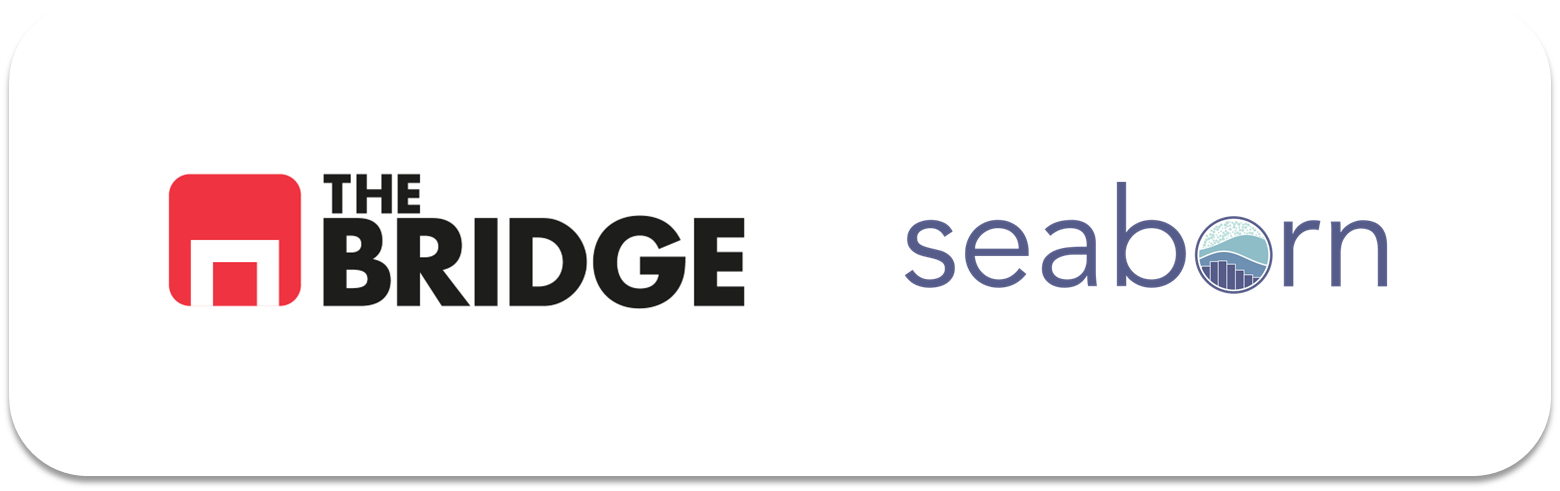

# Visualización Aplicada: Comparando dos variables numéricas

Nos enfocamos ahora ya en visualizar la relación entre dos variables de carácter numérico. Empezamos, como siempre, con nuestras importaciones:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")
df_vuelos_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")

### Gráficos y consideraciones

Nos vamos a centrar en:
- Comparación de diagramas de caja
- Comparación de histogramas 
- Diagramas de dispersión

* **Cuándo**: 
    1. En análisis bivariantes todos son útiles aunque si buscamos relaciones los diagramas de dispersión son interesantes.
    2. En presentaciones: Cuando se están comparando valores de una misma variable en dos tiempos o dos situaciones diferentes, usar la comparación de distribuciones y dispersión (y siempre como un elemento más gráfico que numérico, no abrumar... enfocar). En el caso de dos variables que no miden lo mismo, generalmente buscaremos hablar de la correlación así que usar los diagramas de dispersión marcando el mensaje (pendientes de la correlación, existencia de la correlación incluyendo funciones ideales que la representen, etc). 
  
* **Cuándo no**: Rige lo mismo que para la anterior clasificación, en presentaciones, en general, NO USAR HISTOGRAMAS (salvo que el público lo demande) son muchas barras :-), NI DIAGRAMAS DE CAJAS, si tienes que poner una "caja": usa Violines. Si quieres comparar distribuciones, compara KDE/Densidades, y si lo haces con histrogramas no uses ni muchas ni pocas barras y quita toda referencia numérica salvo la necesaria que apoye el mensaje que se quiera dar.


### Comparación de diagramas de caja


Tiene sentido cuando comparamos variables similares para valores de variables categóricas (como hicimos con "aircompany" e "ingresos" y estábamos comparando ingresos con ingresos), pero también comparando dos fotos en distintos momentos temporales:

In [3]:
df_vuelos_jul = pd.read_csv("./data/dataset_viajes_jul23.csv")
df_vuelos_jul.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,PamPangea,Nueva York,Londres,5566,Airbus A320,True,15255.96072,523,220563.17,Pam_NuLo_11320,Jul23
1,TabarAir,Cincinnati,Los Angeles,3073,Airbus A380,False,36234.35760,224,192311.81,Tab_CiLo_11380,Jul23
2,FlyQ,Barcelona,Roma,859,Boeing 747,False,9248.50940,77,52866.89,Fly_BaRo_10747,Jul23
3,PamPangea,Ginebra,Bali,12383,Boeing 747,False,138602.91900,845,723138.29,Pam_GiBa_10747,Jul23
4,MoldaviAir,Cádiz,Bali,12798,Airbus A380,False,150903.77760,873,807447.93,Mol_CaBa_11380,Jul23


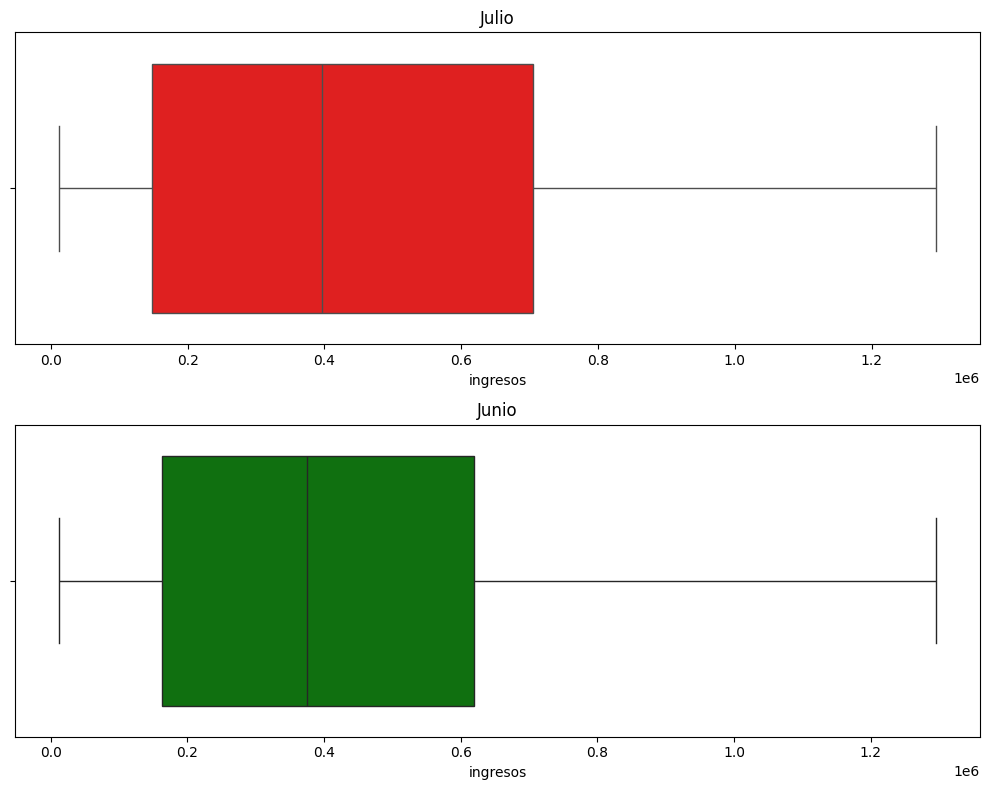

In [5]:
#AC
fig, axs=plt.subplots(2,1,figsize=(10,8))
sns.boxplot(x=df_vuelos_jul["ingresos"],ax=axs[0],color="r")
axs[0].set_title("Julio")
sns.boxplot(x=df_vuelos_jun["ingresos"],ax=axs[1], color="g")
axs[1].set_title("Junio")
plt.tight_layout()


### Comparación de histrogramas


De igual manera que comparamos las dispersiones por los diagramas de cajas, lo hacemos con los histogramas

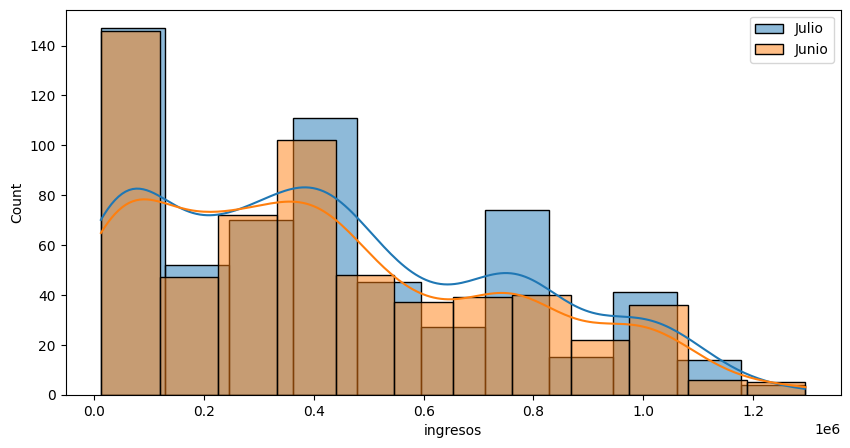

In [8]:
#AC
plt.figure(figsize=(10,5))
sns.histplot(x="ingresos",data=df_vuelos_jul, kde=True, label="Julio")
sns.histplot(x="ingresos",data=df_vuelos_jun, kde=True, label="Junio")
plt.legend()

#### Inciso: Comparaciones numéricas

Antes de seguir, volver a incidir en que siempre es bueno "pintarse" los números, ¿cómo comparamos las estadísticas centrales y de posición de dos variables en diferentes momentos (en este caso temporales)?

In [9]:
metricas_junio = df_vuelos_jun.ingresos.describe()
metricas_julio = df_vuelos_jul.ingresos.describe()

df_comparativa = pd.DataFrame({"julio": metricas_julio, "junio": metricas_junio})
df_comparativa

,julio,junio
count,6.000000e+02,6.000000e+02
mean,4.309536e+05,4.187689e+05
std,3.188093e+05,3.182858e+05
min,1.169364e+04,1.179785e+04
25%,1.480056e+05,1.627668e+05
50%,3.960467e+05,3.754817e+05
75%,7.046383e+05,6.188420e+05
max,1.294102e+06,1.295516e+06



### Diagramas de dispersión

Para terminar, recuperamos la comparación de variables o columnas que están en el mismo dataframe y hacen referencia a la misma fila, es decir son características de una misma entidad:

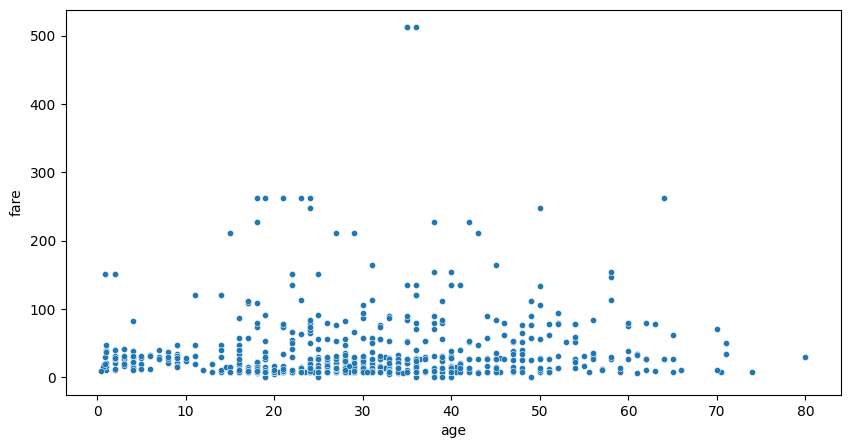

In [10]:
variable_numerica_1 = "age"
variable_numerica_2 = "fare"

plt.figure(figsize=(10,5))
sns.scatterplot(x= variable_numerica_1,
                y= variable_numerica_2,
                data = df_titanic,
               s=20);

Para terminar vamos a ver un complemento interesante, aunque más para el análisis que para las visualizaciones desde mi punto de vista, que es el joinplot:

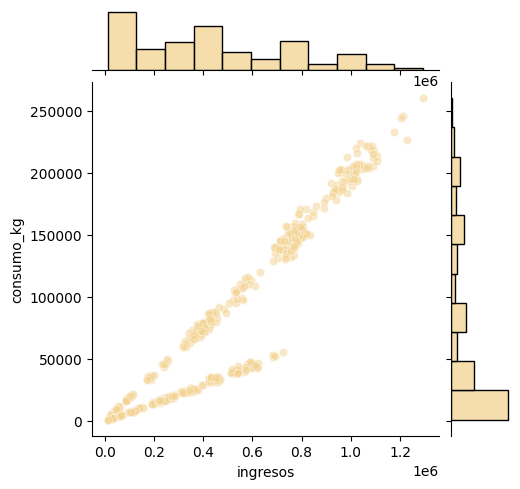

In [13]:
#AC
sns.jointplot(x=df_vuelos_jul["ingresos"],y=df_vuelos_jul["consumo_kg"],color="#f4D391",height=5, alpha=0.5)